In [2]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(5*cols,5*rows))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot( y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter+=1
            if counter==(number_of_column-1,):
                break

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale, minmax_scale

%matplotlib inline

# 파일 열기

In [4]:
data = pd.read_csv("./체질검사.csv", engine='python')
data.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


# 결측치 확인

In [5]:
data.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
dtype: int64

# 데이터 단위변경 및 추가

In [6]:
data["KG"] = data.WEIGHT * 0.45
data["CM"] = data.HEIGHT * 2.54
data["BMI"] = data.KG / pow(data.CM/100,2)
data.drop(["WEIGHT","HEIGHT"],axis=1,inplace=True)

In [7]:
data.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.523870
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,75.6000,180.975,23.082595
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,79.9875,173.990,26.422478
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,66.4875,167.005,23.838617
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,98.5500,162.560,37.293165


# 이상치 확인

IndexError: index 15 is out of bounds for axis 0 with size 15

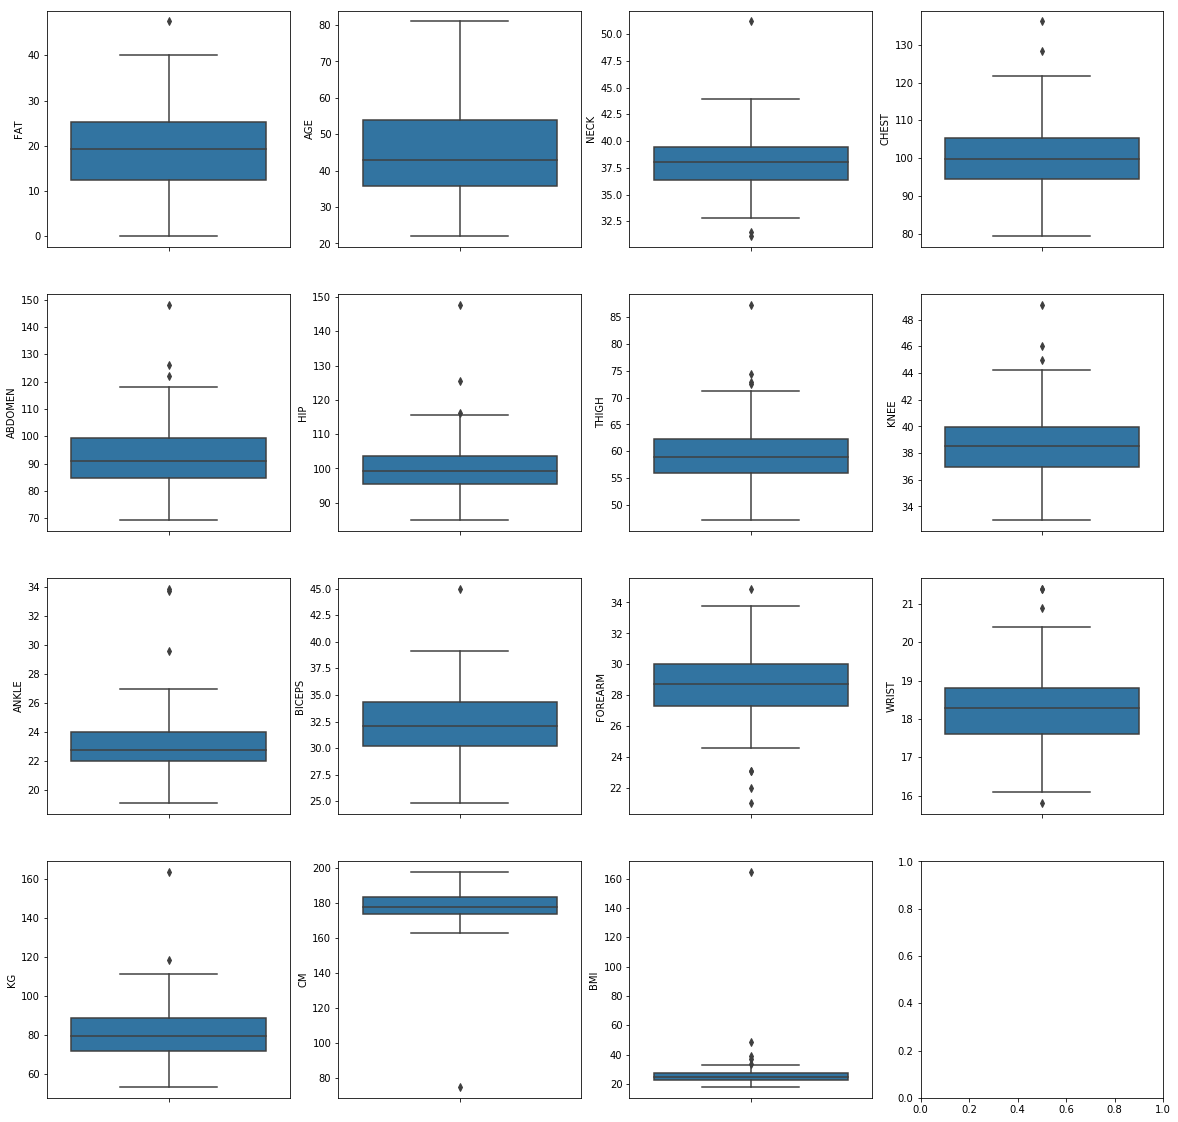

In [8]:
draw_multivarient_plot(data,4,4,"box_plot")

In [9]:
data.describe()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,80.515982,178.177976,25.736762
std,8.368740,12.602040,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,13.225122,9.303654,9.482758
min,0.000000,22.000000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,53.325000,74.930000,17.874982
25%,12.475000,35.750000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,71.550000,173.355000,22.853241
50%,19.200000,43.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,79.425000,177.800000,24.895566
75%,25.300000,54.000000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,88.650000,183.515000,27.118085
max,47.500000,81.000000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,163.417500,197.485000,164.306562


In [10]:
data[data["FAT"] > 40]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,98.5500,162.56,37.293165
140,40.1,49,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0,86.2875,165.10,31.655833


In [11]:
data[data["NECK"] > 45]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.52387


In [12]:
data[data["NECK"] < 32.5]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
33,18.0,43,31.1,93.1,87.3,96.6,54.7,39.0,24.8,31.0,29.4,18.8,74.4750,173.99,24.601520
174,7.7,39,31.5,85.1,76.0,88.2,50.0,34.7,21.0,26.1,23.1,16.1,56.3625,172.72,18.893177


In [13]:
data[data["CHEST"] > 125]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.52387
82,34.5,45,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,118.2375,174.625,38.77416


In [14]:
data[data["ABDOMEN"] > 120]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.523870
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,98.5500,162.560,37.293165
82,34.5,45,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,118.2375,174.625,38.774160


In [15]:
data[data["HIP"] > 120]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.52387
82,34.5,45,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,118.2375,174.625,38.77416


In [16]:
data[data["THIGH"] > 80]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.52387


In [17]:
data[data["KNEE"] > 46]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.52387


In [18]:
data[data["ANKLE"] > 28]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.523870
35,26.6,67,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2,75.1500,171.450,25.565483
93,11.9,32,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4,81.9000,187.325,23.339547


In [19]:
data[data["BICEPS"] > 40]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.52387


In [20]:
data[data["FOREARM"] > 34]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
73,12.5,30,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9,61.425,174.625,20.143379


In [21]:
data[data["FOREARM"] < 24]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
48,12.5,55,33.4,88.8,78.2,87.5,50.8,33.0,19.7,25.3,22.0,15.8,56.9250,169.545,19.803095
114,25.3,36,41.5,115.3,108.8,114.4,69.2,42.4,24.0,35.4,21.0,20.1,102.0375,182.245,30.721935
174,7.7,39,31.5,85.1,76.0,88.2,50.0,34.7,21.0,26.1,23.1,16.1,56.3625,172.720,18.893177
177,16.6,44,41.9,105.6,96.3,102.0,63.3,39.8,24.1,37.3,23.1,19.4,93.9375,185.420,27.322840


In [22]:
data[data["KG"] > 120]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,183.515,48.52387


In [23]:
data[data["CM"] < 140]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
78,32.9,44,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,92.25,74.93,164.306562


## 확인 결과 78은 키가 비정상적으로 작은 것으로 보아 이상치로 판단된다.
## 0은 정상적인 데이터로 보이나, 너무 편향되어 있는 값을 가지고 있으므로 제거한다.

In [24]:
data.drop(0,0,inplace=True)
data.drop(78,0,inplace=True)

IndexError: index 15 is out of bounds for axis 0 with size 15

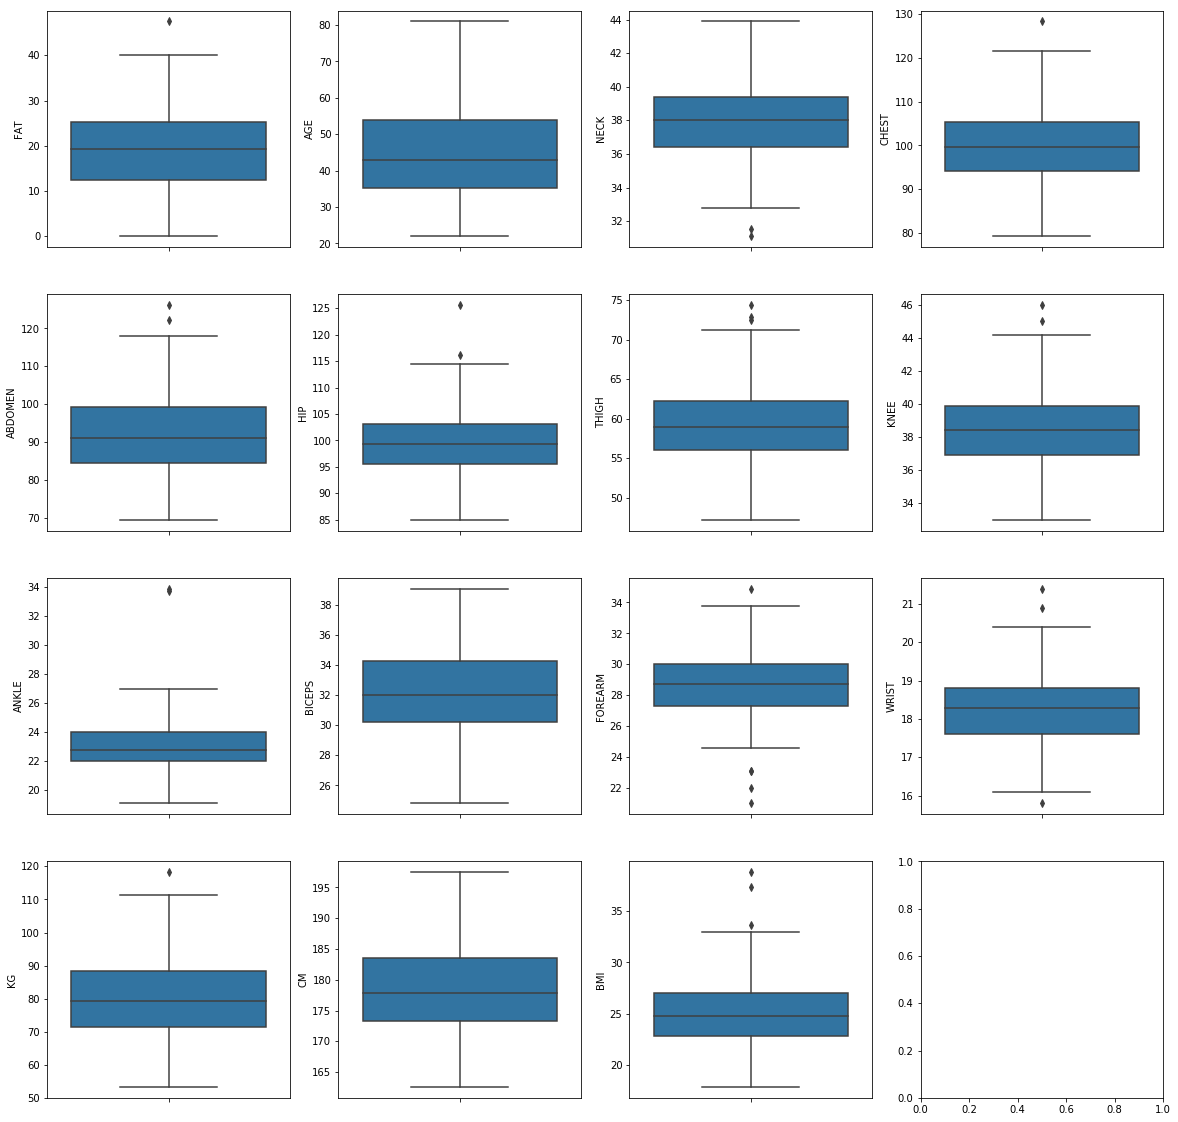

In [25]:
draw_multivarient_plot(data,4,4,"box_plot")

In [26]:
data.describe()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
count,250.0000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,19.0316,44.884000,37.944800,100.662000,92.286800,99.651200,59.249600,38.532800,23.074000,32.217200,28.662400,18.220400,80.13744,178.569620,25.091335
std,8.2940,12.652227,2.290454,8.153765,10.207444,6.443634,4.912309,2.314136,1.650436,2.922449,2.028677,0.913983,12.16597,6.646277,3.320624
min,0.0000,22.000000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,53.32500,162.560000,17.874982
25%,12.4250,35.250000,36.400000,94.250000,84.525000,95.500000,56.000000,36.925000,22.000000,30.200000,27.300000,17.600000,71.32500,173.355000,22.853241
50%,19.2000,43.000000,38.000000,99.600000,90.900000,99.300000,58.950000,38.450000,22.800000,32.000000,28.700000,18.300000,79.25625,177.800000,24.822534
75%,25.2000,54.000000,39.400000,105.300000,99.175000,103.175000,62.250000,39.875000,24.000000,34.300000,30.000000,18.800000,88.53750,183.515000,27.064068
max,47.5000,81.000000,43.900000,128.300000,126.200000,125.600000,74.400000,46.000000,33.900000,39.100000,34.900000,21.400000,118.23750,197.485000,38.774160


In [27]:
data[data["ANKLE"] > 32]

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
35,26.6,67,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2,75.15,171.450,25.565483
93,11.9,32,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4,81.90,187.325,23.339547


## 위의 두 항목은 ANKLE(발목둘레)을 제외한 모든 값들이 평균 근처이다.
## 한국의 경우 성인 남성 발목둘레 평균은 약 25.7 이고 최대값은 31 이다.
## 이상치로 판단하여 제거한다.

In [28]:
data.drop(data[data["ANKLE"] > 32].index, inplace=True)

IndexError: index 15 is out of bounds for axis 0 with size 15

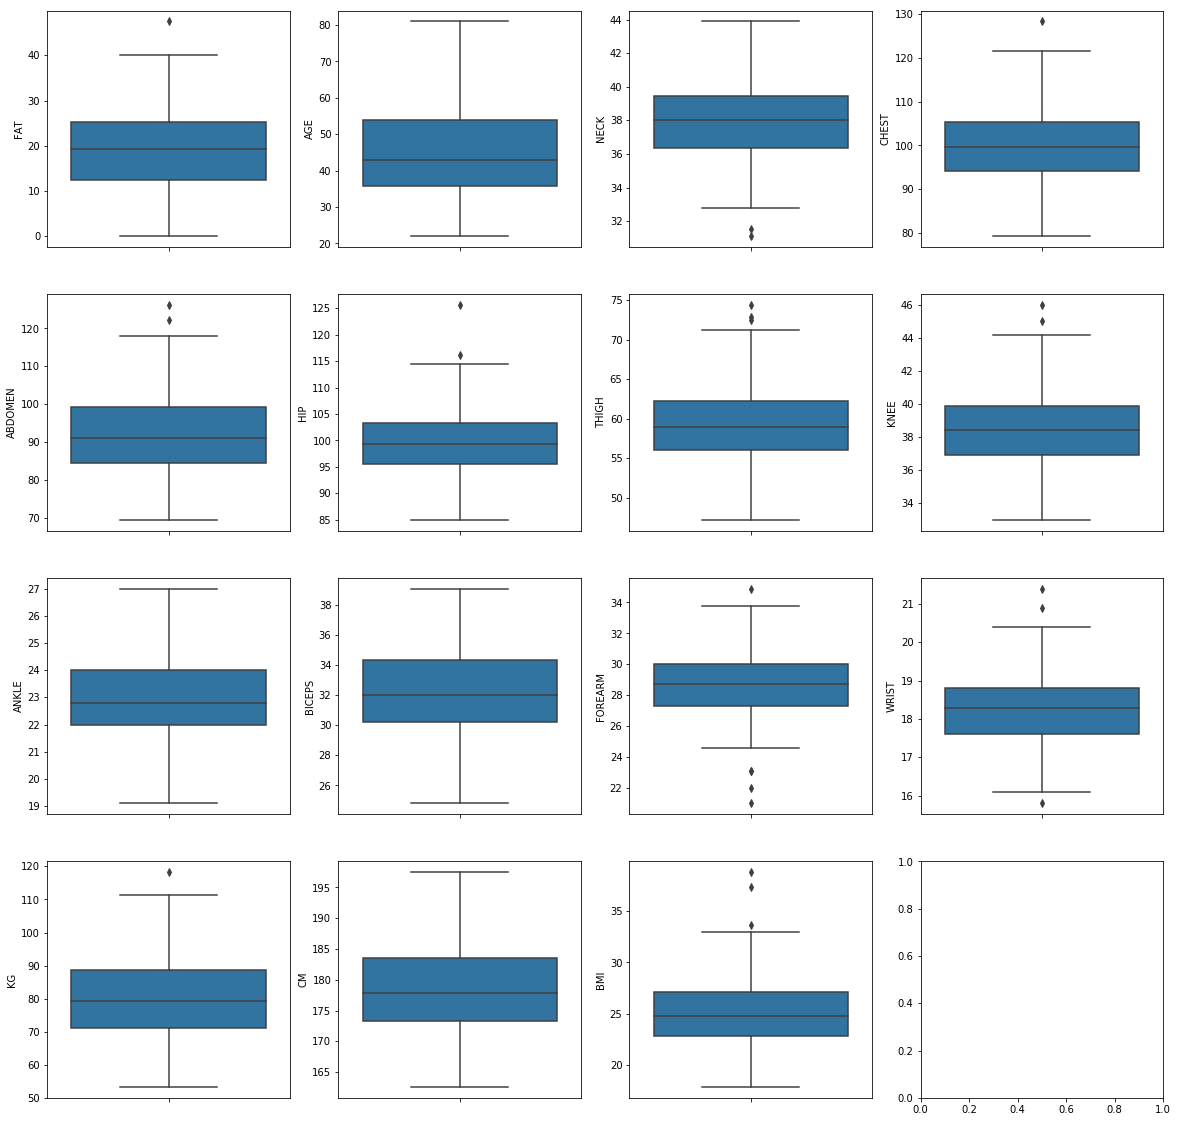

In [29]:
draw_multivarient_plot(data,4,4,"box_plot")

In [30]:
data.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,KG,CM,BMI
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,75.6000,180.975,23.082595
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,79.9875,173.990,26.422478
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,66.4875,167.005,23.838617
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,98.5500,162.560,37.293165
5,24.2,40,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,91.0125,177.800,28.789726


# 그래프 분석

In [31]:
data.drop(["KG","CM"],axis=1,inplace=True)
df_x = data.drop("FAT",axis=1,inplace=False)
df_y = data['FAT']

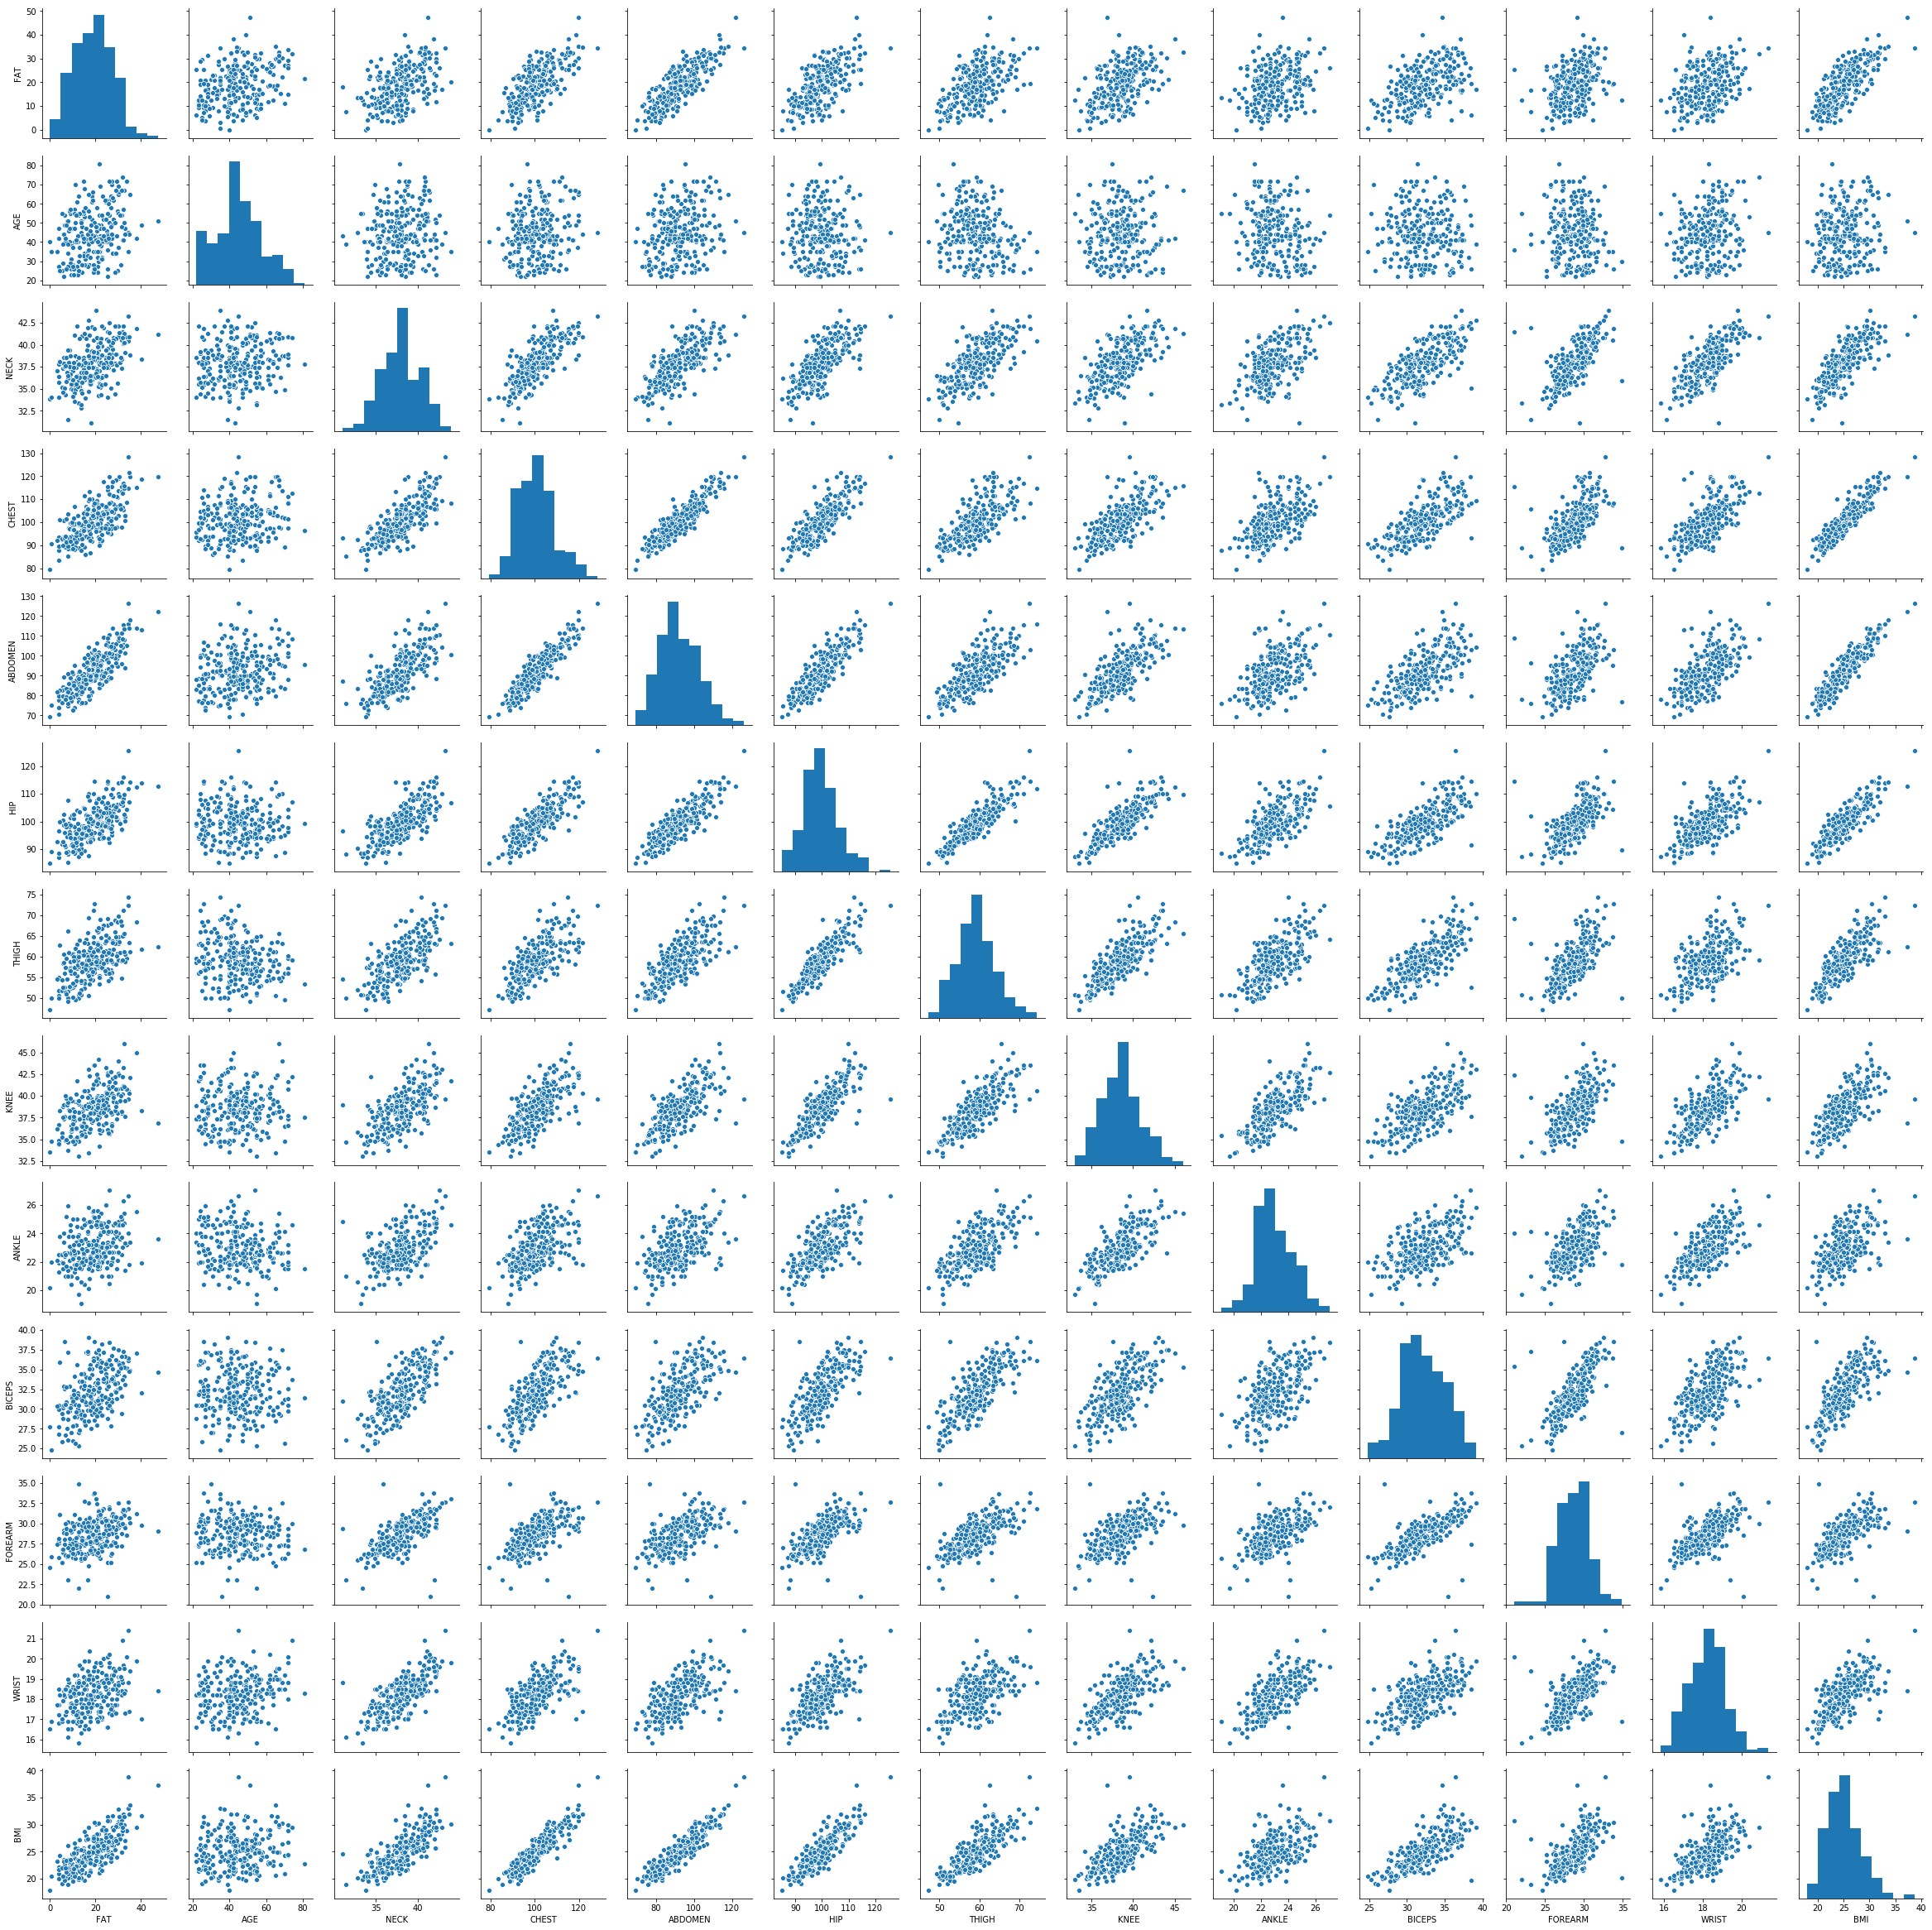

In [32]:
sns.pairplot(data)

## 몇개의 데이터를 제외하면 대체적으로 야으이 상관관계를 가지고 있다.

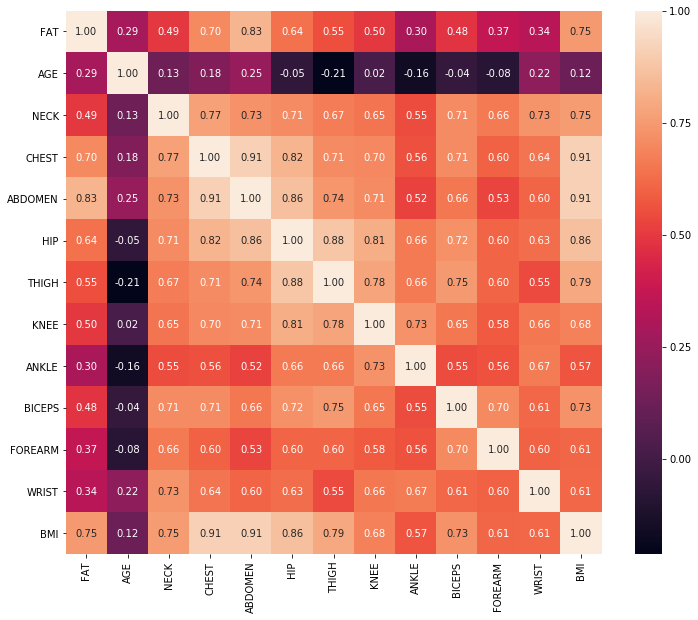

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, fmt='.2f')

## 비만도와 상관관계가 높은 설명변수들은 다른 설명변수들과도 상관 관계가 있어 보인다.
## 설명변수들의 다중공선성을 확인한다.

In [34]:
df_x_const = sm.add_constant(df_x)

In [35]:
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,2.168
10,FOREARM,2.440
8,ANKLE,3.050
9,BICEPS,3.358
11,WRIST,3.484
2,NECK,3.732
7,KNEE,4.404
6,THIGH,7.145
3,CHEST,8.875
5,HIP,9.755


## 목표변수와 상관도가 높은 설명 변수들은 대체적으로 높은 VIF를 나타내었다.

# 회귀분석
## 회귀분석을 통해 P-value 가 낮은 설명 변수들을 하나씩 제거하며 확인한다.

In [37]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     59.23
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           4.54e-64
Time:                        20:14:21   Log-Likelihood:                -703.60
No. Observations:                 248   AIC:                             1433.
Df Residuals:                     235   BIC:                             1479.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5877      7.653      0.469      0.6

In [38]:
df_x_const = df_x_const.drop(["ANKLE"],axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,2.011
9,FOREARM,2.424
10,WRIST,2.847
8,BICEPS,3.311
2,NECK,3.677
7,KNEE,3.842
6,THIGH,7.092
3,CHEST,8.856
5,HIP,9.748
11,BMI,10.543


In [39]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     64.84
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           5.90e-65
Time:                        20:15:05   Log-Likelihood:                -703.68
No. Observations:                 248   AIC:                             1431.
Df Residuals:                     236   BIC:                             1474.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1494      7.551      0.417      0.6

In [40]:
df_x_const = df_x_const.drop(["KNEE"],axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,1.973
8,FOREARM,2.401
9,WRIST,2.688
7,BICEPS,3.311
2,NECK,3.672
6,THIGH,6.346
3,CHEST,8.714
5,HIP,9.028
10,BMI,9.696
4,ABDOMEN,11.420


In [41]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     71.58
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           7.15e-66
Time:                        20:15:11   Log-Likelihood:                -703.74
No. Observations:                 248   AIC:                             1429.
Df Residuals:                     237   BIC:                             1468.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1599      7.537      0.419      0.6

In [42]:
df_x_const = df_x_const.drop(["BICEPS"],axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,1.972
7,FOREARM,2.180
8,WRIST,2.672
2,NECK,3.620
6,THIGH,5.868
3,CHEST,8.563
5,HIP,9.026
9,BMI,9.642
4,ABDOMEN,11.304
0,const,771.675


In [43]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     79.64
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.00e-66
Time:                        20:15:17   Log-Likelihood:                -704.00
No. Observations:                 248   AIC:                             1428.
Df Residuals:                     238   BIC:                             1463.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3681      7.448      0.318      0.7

In [44]:
df_x_const = df_x_const.drop(["THIGH"],axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,1.737
6,FOREARM,2.167
7,WRIST,2.672
2,NECK,3.542
5,HIP,6.663
3,CHEST,8.274
8,BMI,9.150
4,ABDOMEN,11.279
0,const,771.214


In [45]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.13
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           2.36e-67
Time:                        20:15:21   Log-Likelihood:                -704.88
No. Observations:                 248   AIC:                             1428.
Df Residuals:                     239   BIC:                             1459.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6042      7.456      0.349      0.7

In [46]:
df_x_const = df_x_const.drop(["FOREARM"],axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,1.676
6,WRIST,2.538
2,NECK,3.336
5,HIP,6.645
3,CHEST,8.212
7,BMI,8.989
4,ABDOMEN,11.100
0,const,765.134


In [47]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           7.07e-68
Time:                        20:15:28   Log-Likelihood:                -706.07
No. Observations:                 248   AIC:                             1428.
Df Residuals:                     240   BIC:                             1456.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6109      7.447      0.485      0.6

In [48]:
df_x_const = df_x_const.drop(["NECK"],axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,1.663
5,WRIST,1.982
4,HIP,6.640
2,CHEST,7.954
6,BMI,8.827
3,ABDOMEN,11.081
0,const,725.511


In [49]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     116.9
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           1.80e-68
Time:                        20:15:34   Log-Likelihood:                -707.17
No. Observations:                 248   AIC:                             1428.
Df Residuals:                     241   BIC:                             1453.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1336      7.269      0.156      0.8

In [50]:
df_x_const = df_x_const.drop(["HIP"],axis=1,inplace=False)
df_vif = pd.DataFrame()
df_vif["variable"] = df_x_const.columns
df_vif["vif"] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values("vif", inplace=True)
df_vif.round(3)

,variable,vif
1,AGE,1.169
4,WRIST,1.763
2,CHEST,7.949
3,ABDOMEN,8.426
5,BMI,8.468
0,const,509.691


In [51]:
reg_multi_model = sm.OLS(df_y, df_x_const)
reg_multi_res = reg_multi_model.fit()
print(reg_multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     138.7
Date:                Fri, 08 Feb 2019   Prob (F-statistic):           5.92e-69
Time:                        20:15:43   Log-Likelihood:                -708.63
No. Observations:                 248   AIC:                             1429.
Df Residuals:                     242   BIC:                             1450.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5526      6.116     -0.908      0.3

## P-value 가 유의수준보다 높은 설명변수들을 제거 해 나간 결과 다중공선성을 만족시켰다.

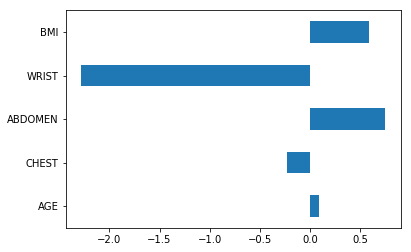

In [100]:
df_reg_coef = pd.DataFrame({"Coef":reg_multi_res.params.values[1:]},index=reg_multi_model.exog_names[1:])
df_reg_coef.plot.barh(y="Coef",legend=False)

/home/donghyun-lee/miniconda3/envs/DS/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


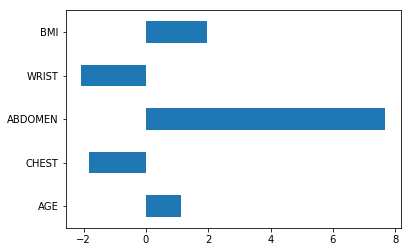

In [102]:
df_x_scaled = scale(df_x_const)
reg_scaled_model = sm.OLS(df_y,df_x_scaled)
reg_scaled_res = reg_scaled_model.fit()
df_reg_scaled_coef = pd.DataFrame({"Coef": reg_scaled_res.params.values[1:]},index=reg_multi_model.exog_names[1:])
df_reg_scaled_coef.plot.barh(y="Coef",legend=False)

(250,)

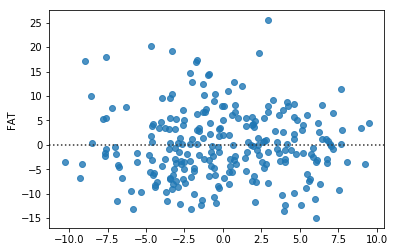

In [106]:
obs = reg_multi_res.resid.values
sns.residplot(obs,df_y)
obs.shape

((array([-2.77398064, -2.47188227, -2.30034444, -2.17785208, -2.08131167,
         -2.00098761, -1.93181728, -1.87081737, -1.81607586, -1.76629081,
         -1.72053405, -1.67811963, -1.63852567, -1.60134548, -1.56625574,
         -1.53299497, -1.50134856, -1.47113811, -1.44221367, -1.41444787,
         -1.38773163, -1.36197075, -1.33708328, -1.3129975 , -1.28965023,
         -1.26698552, -1.24495361, -1.22350997, -1.20261465, -1.18223161,
         -1.16232826, -1.14287501, -1.12384491, -1.10521333, -1.08695771,
         -1.06905733, -1.05149311, -1.03424742, -1.01730397, -1.00064765,
         -0.98426442, -0.9681412 , -0.95226581, -0.93662686, -0.9212137 ,
         -0.90601634, -0.8910254 , -0.87623208, -0.86162807, -0.84720556,
         -0.83295716, -0.81887589, -0.80495514, -0.79118867, -0.77757053,
         -0.76409509, -0.750757  , -0.73755115, -0.72447269, -0.71151699,
         -0.69867964, -0.68595641, -0.67334326, -0.66083634, -0.64843195,
         -0.63612654, -0.62391671, -0.

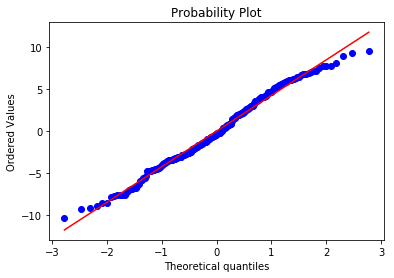

In [107]:
stats.probplot(obs, dist="norm",plot=plt)